In [3]:
#importing the libraries which needed in the assignment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#libraries needed for model building 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#libraries needed for model evaluation

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

### 1. Data Importing

In [4]:
leads=pd.read_csv('C:\\Users\\HP\\Downloads\\Leads.csv')
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#checking null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
(round(leads.isnull().sum()/len(leads),2))*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

* We have some object type values and we have to convert into int values

###  2. Data preperation

* converting yes/no to 1/0 

In [10]:
# Encoding the variables with yes/no labels

for feature in ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']:
    leads[feature]=leads[feature].apply(lambda x : 1 if x=='Yes' else 0)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [11]:
# checking the remaining object type variable
leads.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [12]:
# Checking value counts
for col in leads.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print('------')
    print(leads[col].value_counts(normalize=True))
    print('------')

Lead Origin
------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
------
Lead Source
------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
------
Last Activity
------
Email Opened                    0.376163
SMS Sent

In [13]:
# Converting select to Nan. because the customer didn't select anything
leads=leads.replace('Select',np.nan)

In [14]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### imputing missing values

In [15]:
# Dropping columns having more than 40% of missing values
leads=leads.drop(leads.loc[:,list(round(leads.isnull().sum()/len(leads),2)>0.40)].columns,1)

C:\Users\HP\AppData\Local\Temp\ipykernel_18268\793637735.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads=leads.drop(leads.loc[:,list(round(leads.isnull().sum()/len(leads),2)>0.40)].columns,1)


In [16]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [17]:
leads.shape

(9240, 30)

In [18]:
(round(leads.isnull().sum()/len(leads),2))*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

Visualizing the columns with null values

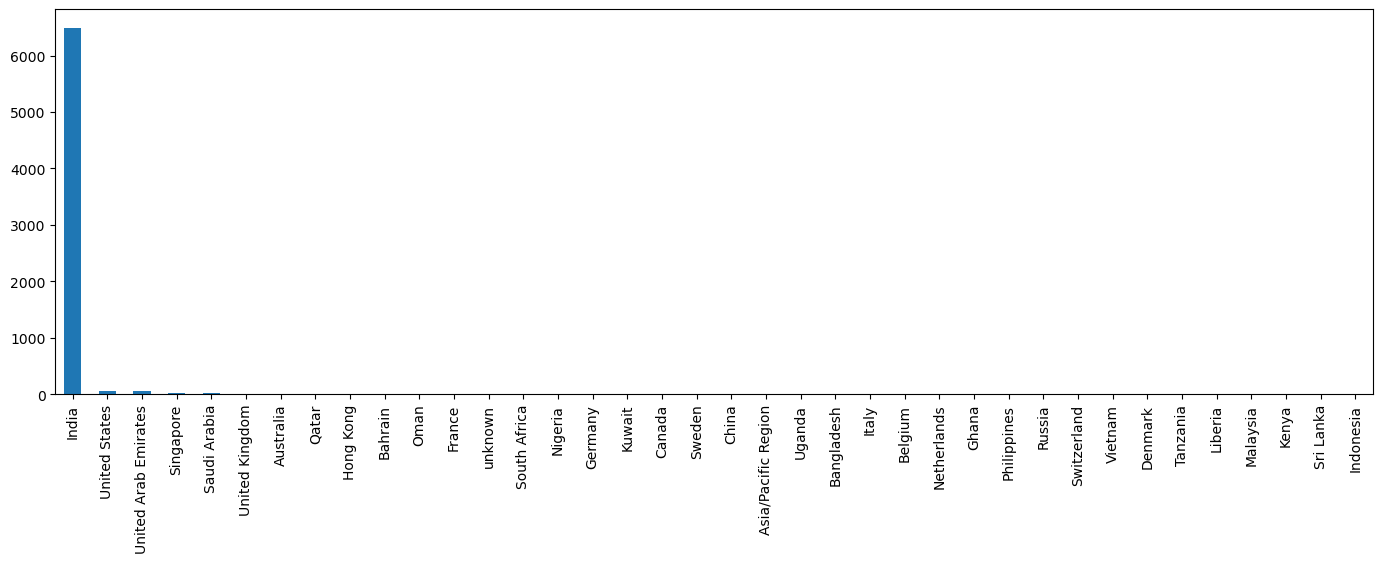

In [19]:
plt.figure(figsize=(17, 5))
leads['Country'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()


- Most values are INDIA compared to the other, So we can impute this value to null values

In [20]:
leads['Country']=leads['Country'].replace(np.nan,'India')

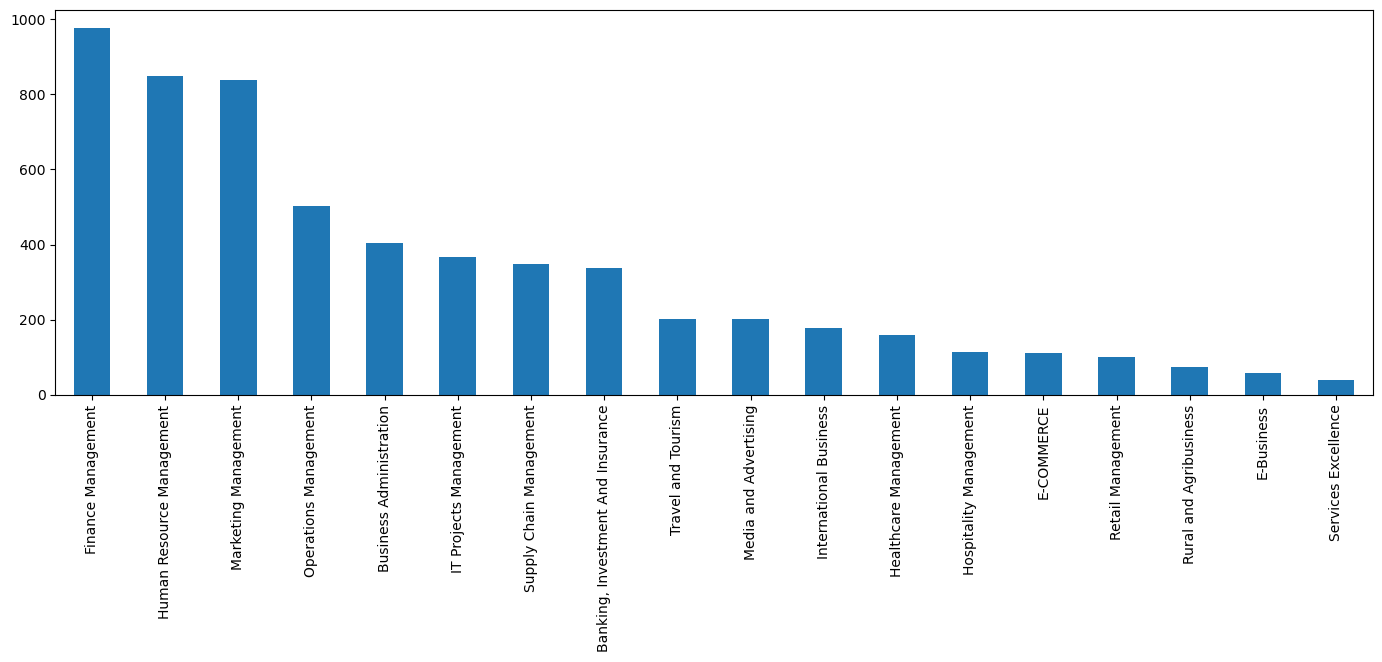

In [21]:
plt.figure(figsize=(17, 5))
leads['Specialization'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

- We cannot impute any of these values to null values. 
- We have to assume that the people could have choosen any other specialization which maynot be in the list
- so we can add another column named 'other' in this section

In [22]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

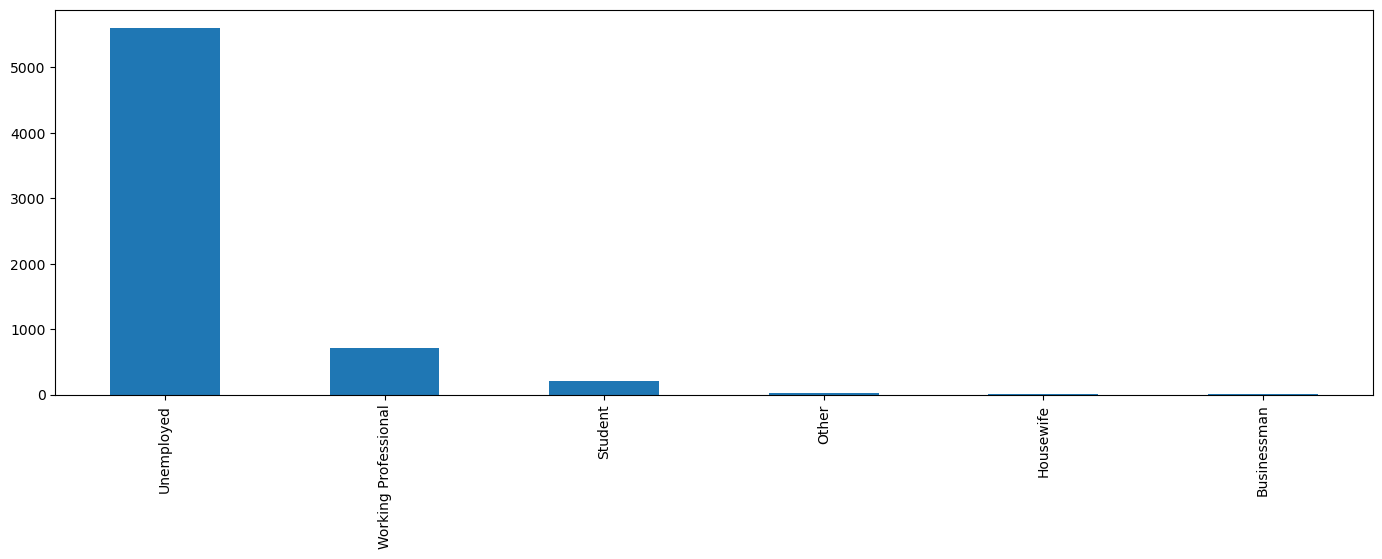

In [23]:

plt.figure(figsize=(17, 5))
leads['What is your current occupation'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

- Most of the leads are unemployed so we can impute missing values to this category

In [24]:
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')

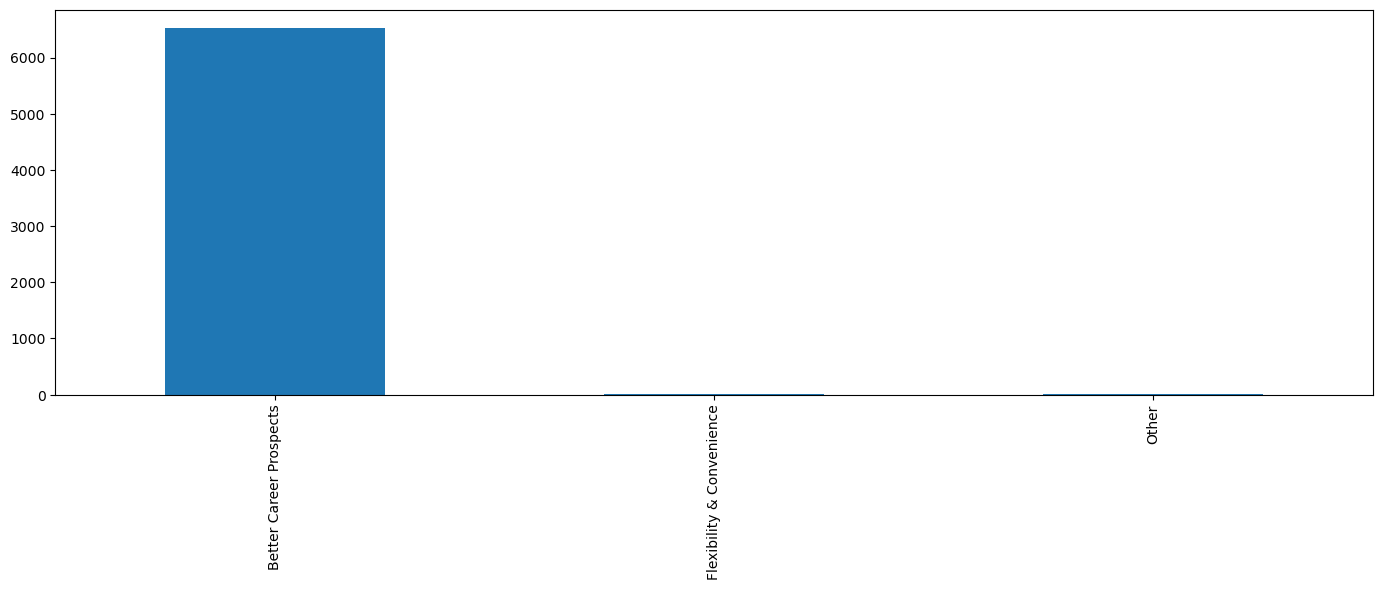

In [25]:
plt.figure(figsize=(17, 5))
leads['What matters most to you in choosing a course'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [26]:
# check the value count of this column

round(leads['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

- All the leads are selecting course for better career, so no need of this column and we can drop this column

In [27]:
leads=leads.drop('What matters most to you in choosing a course',axis=1)

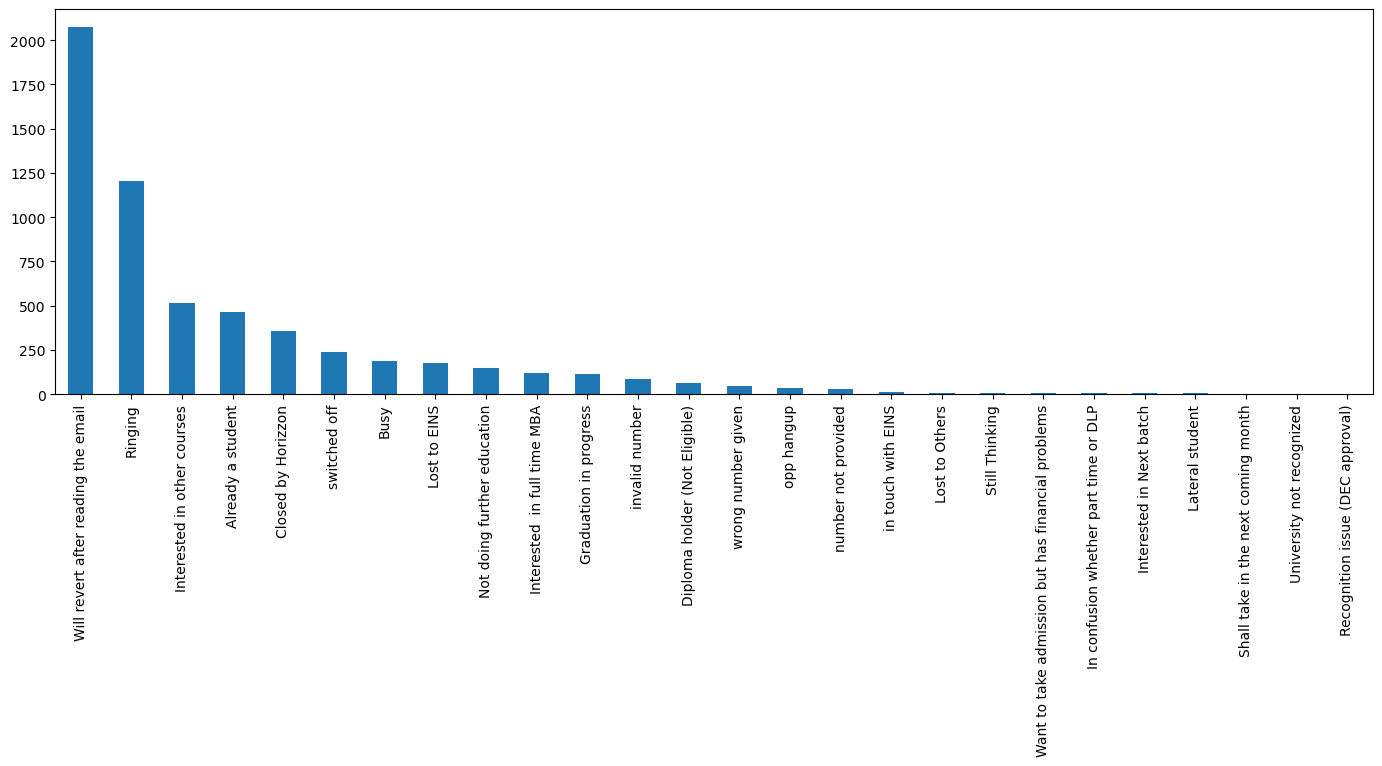

In [28]:
plt.figure(figsize=(17, 5))
leads['Tags'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()


- we can impute missing values in will revert after reading the email. 
- Since that column have significant amount of values

In [29]:
leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')

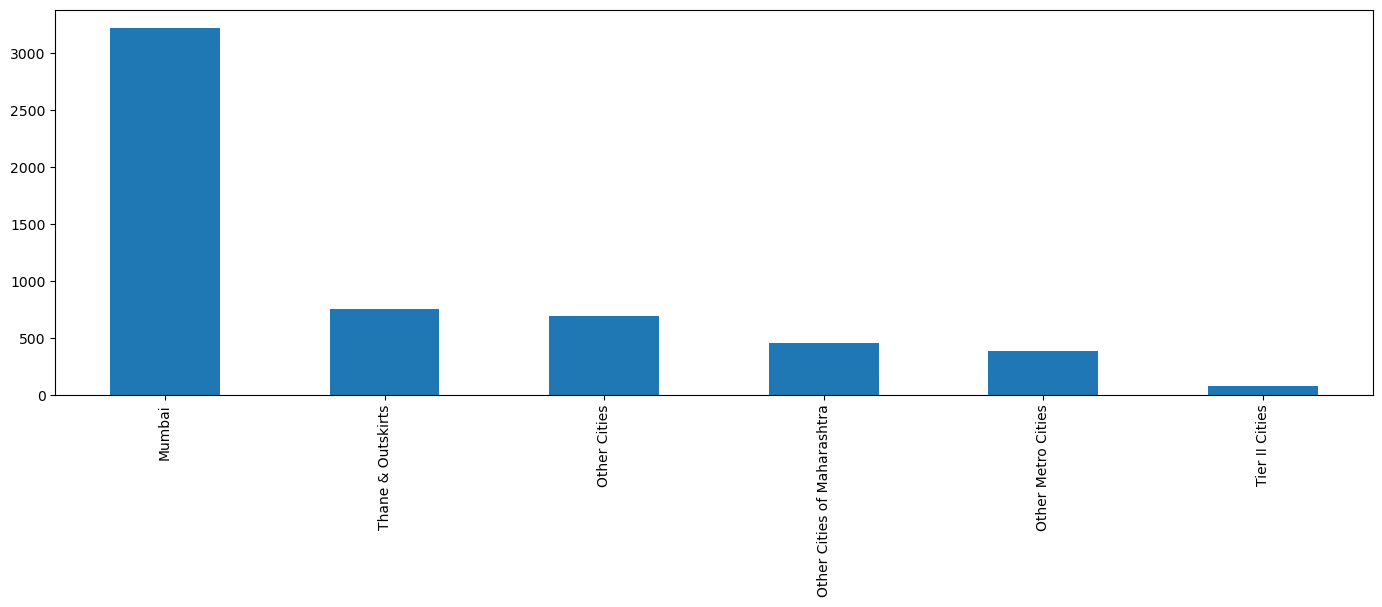

In [30]:
plt.figure(figsize=(17, 5))
leads['City'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

- Mumbai has high values. Most the leads are from Maharashtra region. Better to impute the missing value in Mumbai  

In [31]:
leads['City']=leads['City'].replace(np.nan,'Mumbai')

- Now we imputed most of the null values according to our logic. And we can check the null values once

In [32]:
(round(leads.isnull().sum()/len(leads),2))*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

- Three columns having null values around 1%. Better to drop these 

In [33]:
leads.dropna(inplace = True)

In [34]:
(round(leads.isnull().sum()/len(leads),2))*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

- We treated null values. Now there is no null values

In [35]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   int64  
 5   Do Not Call                               9074 non-null   int64  
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

# EDA

### Univariate Analysis and Bivariate Analysis

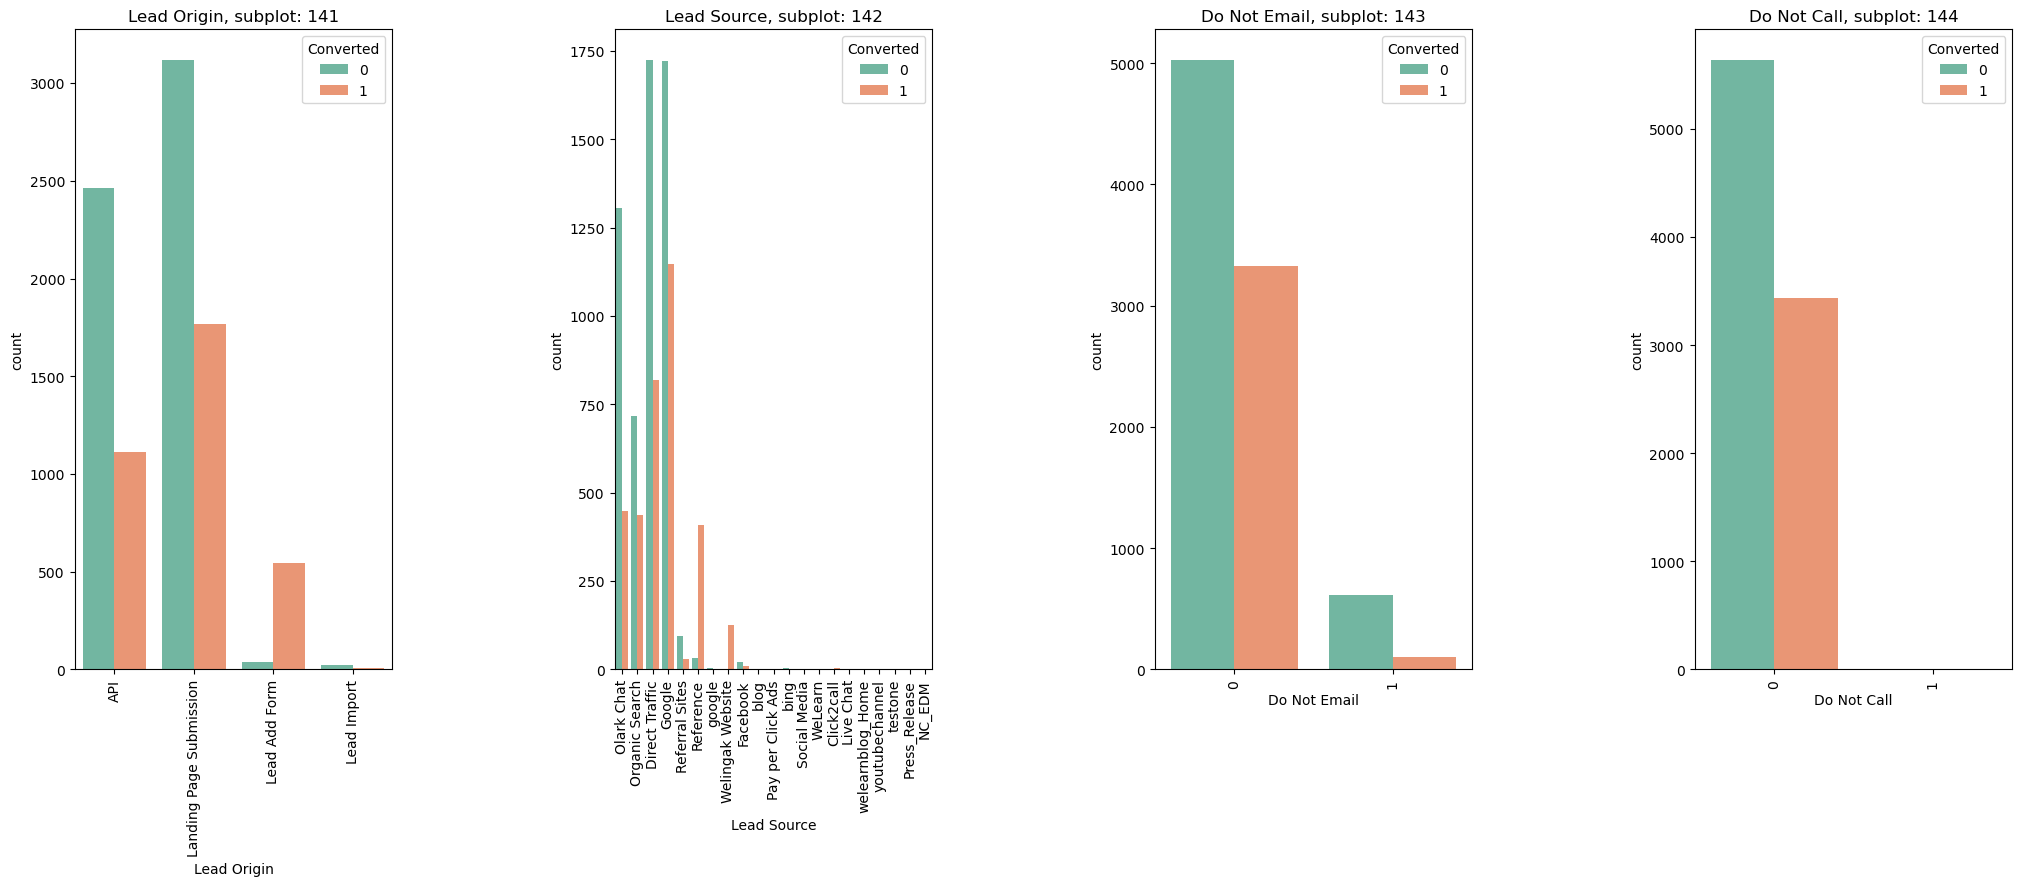

In [36]:
columns_to_plot = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call']

a = 1  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(25, 8))

for col_name in columns_to_plot:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col_name, a, b, c))
    plt.xlabel(col_name)
    sns.countplot(x=col_name,hue='Converted', data=leads, palette="Set2")
    
   
    plt.xticks(rotation=90)
    
    c = c + 1


fig.subplots_adjust(wspace=0.7, top=0.9, bottom=0.1)

plt.show()

Inference

- API and Landing Page Submission have 45-55% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more conversion rate but count of lead are not very high.
- Lead Import are very less in count.
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high compared to the number of leads generated.
- for Do Not Call & Do Not Email, most of the entries are no. nothing can be drawn from this

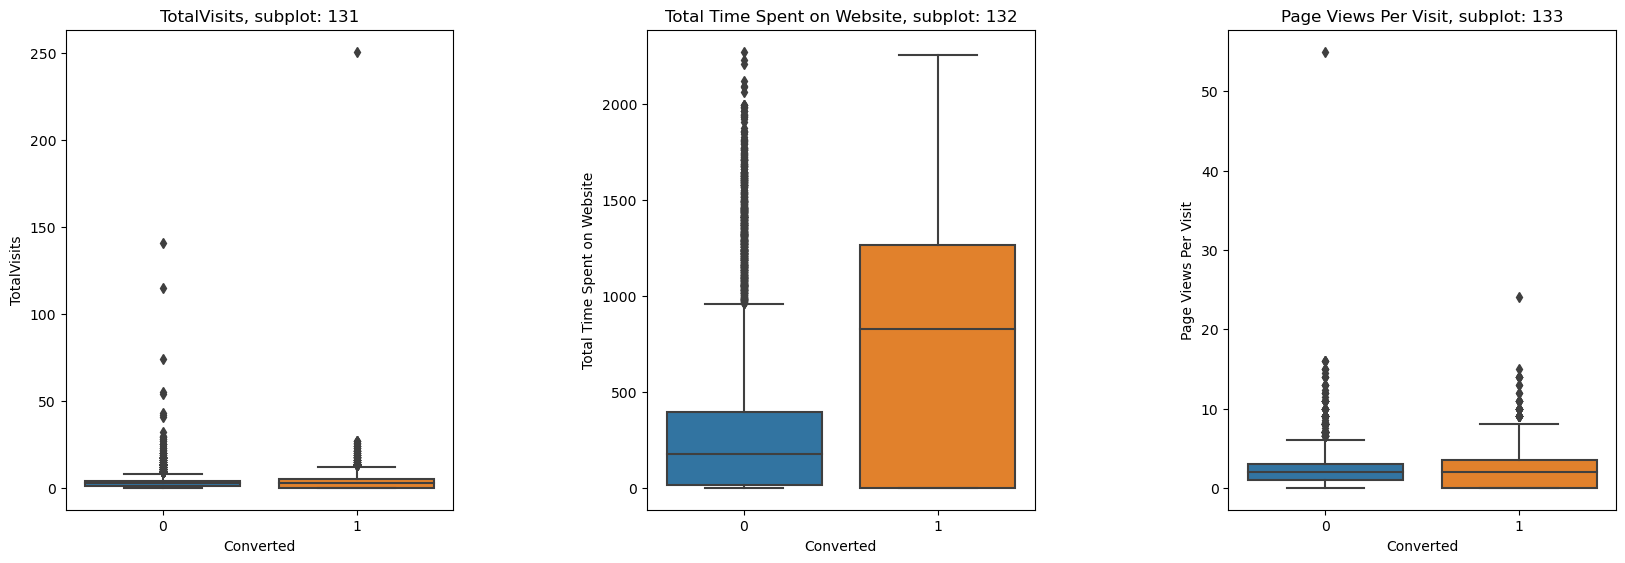

In [37]:
columns_to_plot = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 6))

for col_name in columns_to_plot:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col_name, a, b, c))
    sns.boxplot(x='Converted', y=col_name, data=leads)
    
    c = c + 1

fig.subplots_adjust(wspace=0.5, top=0.9, bottom=0.1)

plt.show()

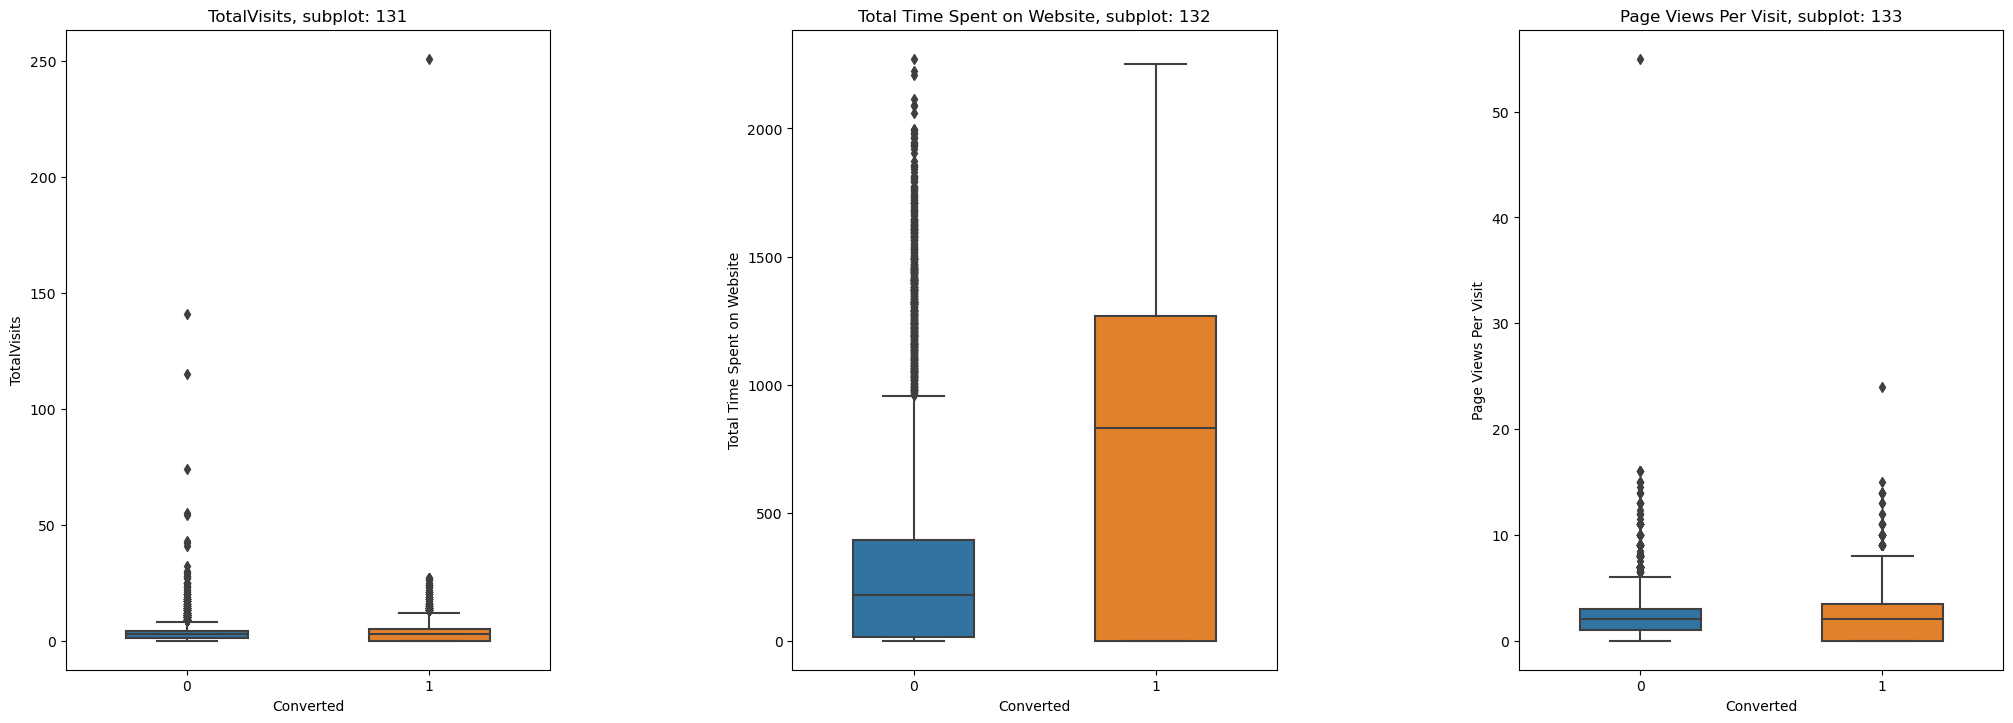

In [38]:

columns_to_plot = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(25, 8)) 

for col_name in columns_to_plot:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col_name, a, b, c))
    sns.boxplot(x='Converted', y=col_name, data=leads, width=0.5)  
    
    c = c + 1


fig.subplots_adjust(wspace=0.5, top=0.9, bottom=0.1)

plt.show()


As we see the outliers in the boxplots,We will cap the outliers to 95% value for analysis.

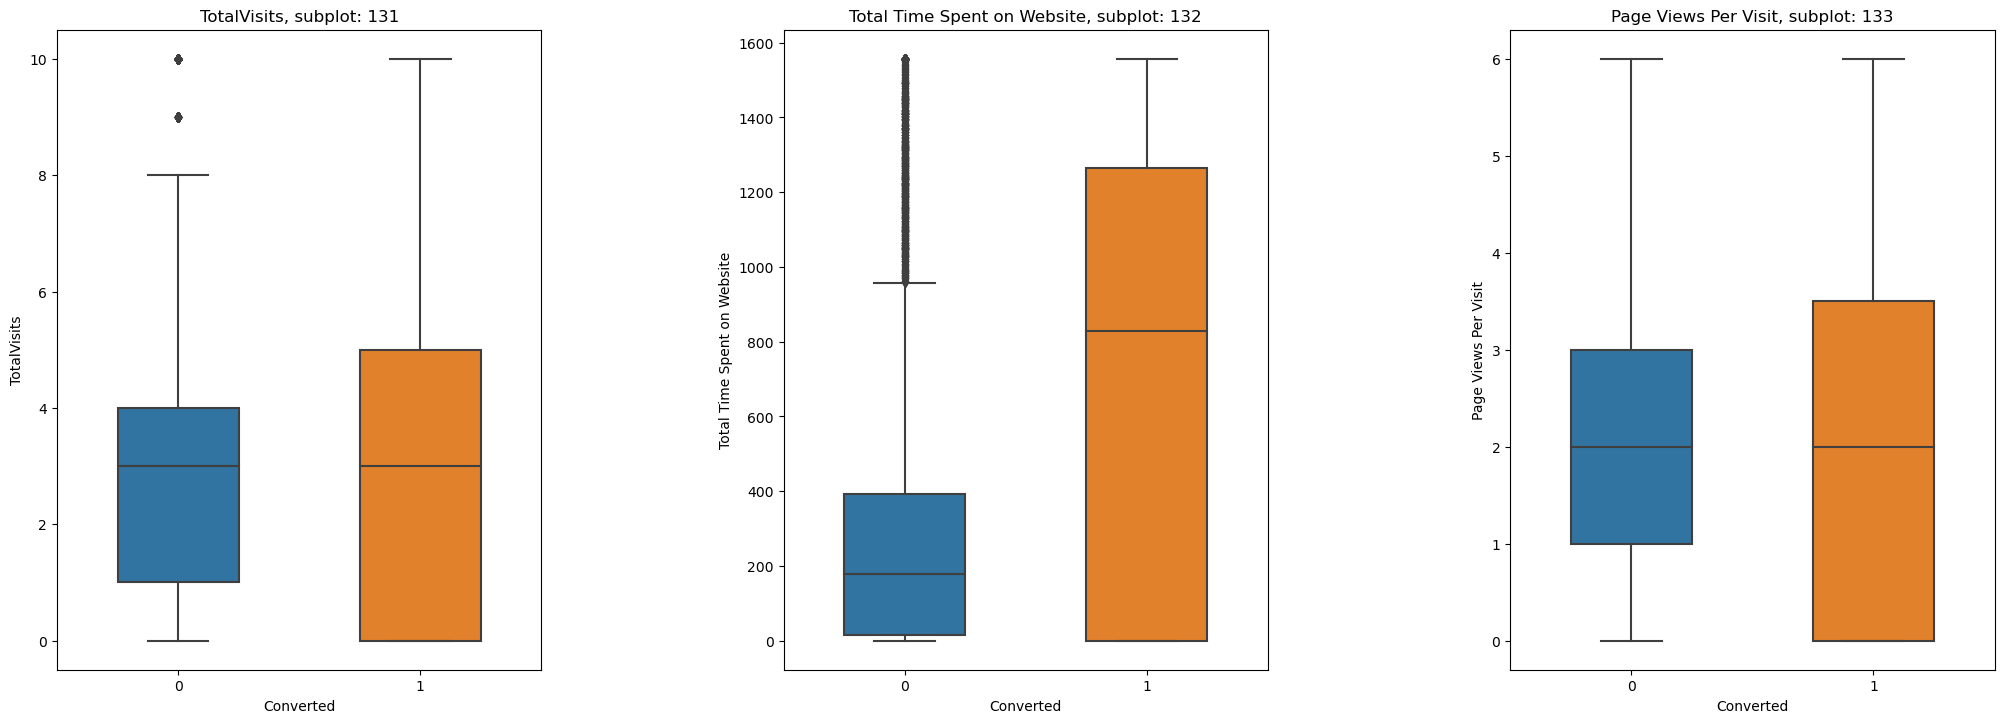

In [39]:
columns_to_plot = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(25, 8))

for col_name in columns_to_plot:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col_name, a, b, c))
    
    # Capping extreme values
    cap_value = leads[col_name].quantile(0.95)  # Setting the cap at the 95th percentile
    
    capped_data = leads[col_name].clip(upper=cap_value)
    
    sns.boxplot(x='Converted', y=capped_data, data=leads, width=0.5)
    
    c = c + 1


fig.subplots_adjust(wspace=0.5, top=0.9, bottom=0.1)

plt.show()

- These are the results after treating outliers by using simple capping approach

- For TotalVisits & Pages Views per visit column the Median for converted and not converted leads are the same.
- Leads spending more time on the weblise are more likely to be converted.


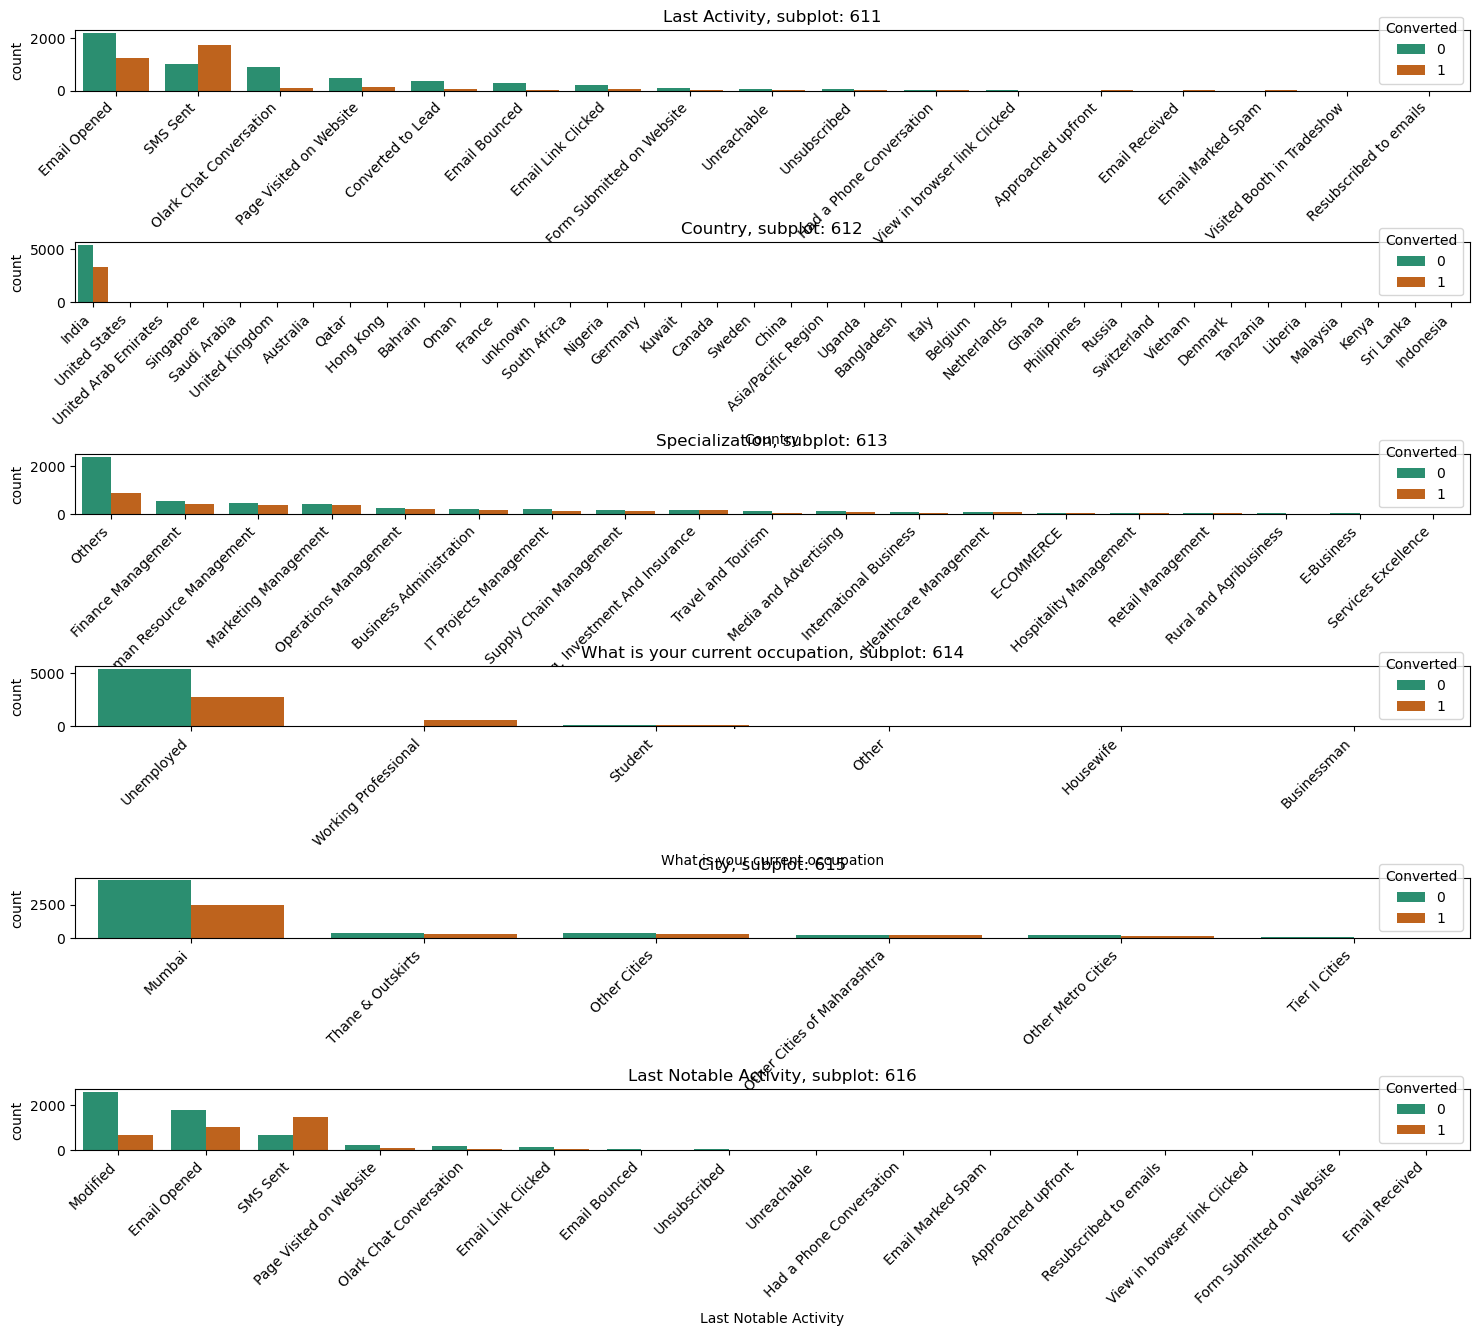

In [40]:

columns_to_plot = ['Last Activity', 'Country', 'Specialization', 'What is your current occupation','City','Last Notable Activity']

a = 6  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18, 14)) 

for col_name in columns_to_plot:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col_name, a, b, c))
    
    order = leads[col_name].value_counts().index
    
    sns.countplot(x=col_name, hue='Converted', data=leads, order=order, palette="Dark2")
    
    plt.xticks(rotation=45, ha='right')  
    
    c = c + 1


fig.subplots_adjust(hspace=2.5, top=0.9, bottom=0.1)

plt.show()


### Inference

 Last Activity

- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is more.

Country

- Most of the leads who are joined in this course are Indians

What is your current occupation

- higest conversion rate is for people who are working 
- About 50% of the unemployed people are converted

Last Notable Activity

- People who sent SMS as their last activity has more conversion rate than the other activities

There are other columns which gives No as major answer and least important columns.
We can drop that columns

In [41]:
leads= leads.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_18268\2357561951.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads= leads.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',


In [42]:
leads.shape

(9074, 14)

In [43]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

### Creating Dummy variables for the categorical features and dropping the first column

In [44]:
dummy_data = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Merge the dummy data to the original data 

In [45]:
leads = pd.concat([leads, dummy_data], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [46]:
leads.shape

(9074, 96)

## Train - Test Split

In [47]:
x= leads.drop(['Prospect ID','Converted'], axis=1)
x.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,2.0,1428,1.0,Converted to Lead,Others,Un

In [48]:
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

### Scaling

In [50]:
scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,Landing Page Submission,Direct Traffic,0,0,-0.284595,-0.160255,-0.179666,Email Opened,Finance Management,Unemployed,Mumbai,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,Landing Page Submission,Direct Traffic,1,0,-0.284595,-0.540048,-0.179666,Email Bounced,Others,Working Professional,Mumbai,Email Bounced,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,API,Olark Chat,0,0,-0.671384,-0.888650,-1.132538,SMS Sent,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,Landing Page Submission,Direct Traffic,0,0,-0.284595,1.643304,-0.179666,SMS Sent,Marketing Management,Unemployed,Other Cities,SMS Sent,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate through each column in X_train
for column in x_train.columns:
    x_train[column] = label_encoder.fit_transform(x_train[column])


### Feature Selection Using RFE

In [52]:
logreg = LogisticRegression()


In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [55]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True,  True,  True, False])

In [56]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', False, 15),
 ('Lead Source', False, 40),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 50),
 ('Total Time Spent on Website', False, 61),
 ('Page Views Per Visit', False, 57),
 ('Last Activity', False, 70),
 ('Specialization', False, 52),
 ('What is your current occupation', False, 34),
 ('City', False, 54),
 ('Last Notable Activity', False, 35),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 9),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 72),
 ('Lead Source_Olark Chat', False, 51),
 ('Lead Source_Organic Search', False, 49),
 ('Lead Source_Pay per Click Ads', False, 73),
 ('Lead Source_Press_Release', False, 63),
 ('Lead Source_Reference', False, 37),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Soci

In [57]:
cols = x_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Marked Spam',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

## Model Building

Assessing the model with StatsModels

Model 1

In [58]:
x_train_sm = sm.add_constant(x_train[cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3029.7
Date:                Mon, 18 Dec 2023   Deviance:                       6059.4
Time:                        11:00:45   Pearson chi2:                 6.61e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3154
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3458      0.584      2.306      0.021       0.202       2.490
Do Not Email                                            -1.7123      0.197     -8.712      0.000      -2.097      -1.327
Lead Origin_Landing Page Submission                     -1.2328      0.112    -11.048      0.000      -1.452      -1.014
Lead Origin_Lead Add Form                                2.0193      0.224      9.018      0.000       1.580       2.458
Lead Source_Welingak Website                             2.8096      0.764      3.677      0.000       1.312       4.307
Last Activity_Converted to Lead                         -1.2235      0.203     -6.037      0.000      -1.621      -0.826
Last Activity_Email Bounced                             -0.7191      0.410     -1.753      0.080      -1.523       0.085
Last Activity_Email Marked Spam                         12.1625   1.45e+04      0.001      0.999   -2.84e+04    2.84e+04
Last Activity_Had a Phone Conversation                   1.8767      0.962      1.950      0.051      -0.009       3.763
Last Activity_Olark Chat Conversation                   -1.3965      0.153     -9.125      0.000      -1.696      -1.097
Specialization_Others                                   -1.3837      0.115    -12.034      0.000      -1.609      -1.158
What is your current occupation_Housewife               21.4461   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
What is your current occupation_Student                 -0.7132      0.616     -1.159      0.247      -1.920       0.493
What is your current occupation_Unemployed              -1.1410      0.581     -1.963      0.050      -2.280      -0.002
What is your current occupation_Working Professional     1.5469      0.607      2.548      0.011       0.357       2.737
Last Notable Activity_Email Marked Spam                 12.1625   1.45e+04      0.001      0.999   -2.84e+04    2.84e+04
Last Notable Activity_Had a Phone Conversation           1.1072      1.433      0.773      0.440      -1.701       3.915
Last Notable Activity_Resubscribed to emails            23.7450   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                           1.6193      0.073     22.094      0.000       1.476       1.763
Last Notable Activity_Unreachable                        1.3918      0.446      3.122      0.002       0.518       2.265
Last Notable Activity_Unsubscribed                       1.7955      0.477      3.765      0.000       0.861       2.730
========================================================================================================================
"""

- P values of Last Notable Activity_Resubscribed to emails,Last Notable Activity_Email Marked Spam,What is your current occupation_Housewife,Last Activity_Email Marked Spam are very high compared to the permissible limit(0.05)

- So we can drop these columns

In [59]:

col1 = cols.drop(['Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_Email Marked Spam', 'What is your current occupation_Housewife', 'Last Activity_Email Marked Spam'])



In [60]:
col1

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

### Model 2

In [61]:
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3036.3
Date:                Mon, 18 Dec 2023   Deviance:                       6072.5
Time:                        11:00:46   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7972      0.537      3.348      0.001       0.745       2.849
Do Not Email                                            -1.6673      0.193     -8.618      0.000      -2.046      -1.288
Lead Origin_Landing Page Submission                     -1.2302      0.111    -11.036      0.000      -1.449      -1.012
Lead Origin_Lead Add Form                                2.0356      0.224      9.094      0.000       1.597       2.474
Lead Source_Welingak Website                             2.7834      0.764      3.645      0.000       1.287       4.280
Last Activity_Converted to Lead                         -1.2259      0.203     -6.050      0.000      -1.623      -0.829
Last Activity_Email Bounced                             -0.7619      0.409     -1.862      0.063      -1.564       0.040
Last Activity_Had a Phone Conversation                   1.8652      0.960      1.943      0.052      -0.016       3.746
Last Activity_Olark Chat Conversation                   -1.4014      0.153     -9.151      0.000      -1.702      -1.101
Specialization_Others                                   -1.3816      0.115    -12.025      0.000      -1.607      -1.156
What is your current occupation_Student                 -1.1666      0.570     -2.048      0.041      -2.283      -0.050
What is your current occupation_Unemployed              -1.5918      0.532     -2.990      0.003      -2.635      -0.549
What is your current occupation_Working Professional     1.0924      0.560      1.950      0.051      -0.006       2.191
Last Notable Activity_Had a Phone Conversation           1.1160      1.431      0.780      0.435      -1.688       3.920
Last Notable Activity_SMS Sent                           1.6134      0.073     22.039      0.000       1.470       1.757
Last Notable Activity_Unreachable                        1.3748      0.447      3.078      0.002       0.499       2.250
Last Notable Activity_Unsubscribed                       1.7479      0.476      3.676      0.000       0.816       2.680
========================================================================================================================
"""

p value of Last Notable Activity_Had a Phone Conversation is high, we can drop that columns

In [62]:
col2 = col1.drop('Last Notable Activity_Had a Phone Conversation')
col2

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

### Model 3

In [63]:
x_train_sm = sm.add_constant(x_train[col2])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3036.6
Date:                Mon, 18 Dec 2023   Deviance:                       6073.2
Time:                        11:00:46   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3139
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7979      0.537      3.349      0.001       0.746       2.850
Do Not Email                                            -1.6725      0.193     -8.644      0.000      -2.052      -1.293
Lead Origin_Landing Page Submission                     -1.2305      0.111    -11.041      0.000      -1.449      -1.012
Lead Origin_Lead Add Form                                2.0362      0.224      9.096      0.000       1.597       2.475
Lead Source_Welingak Website                             2.7848      0.764      3.646      0.000       1.288       4.282
Last Activity_Converted to Lead                         -1.2260      0.203     -6.051      0.000      -1.623      -0.829
Last Activity_Email Bounced                             -0.7572      0.409     -1.851      0.064      -1.559       0.045
Last Activity_Had a Phone Conversation                   2.4447      0.672      3.636      0.000       1.127       3.763
Last Activity_Olark Chat Conversation                   -1.4007      0.153     -9.146      0.000      -1.701      -1.101
Specialization_Others                                   -1.3836      0.115    -12.046      0.000      -1.609      -1.158
What is your current occupation_Student                 -1.1665      0.570     -2.048      0.041      -2.283      -0.050
What is your current occupation_Unemployed              -1.5917      0.532     -2.990      0.003      -2.635      -0.548
What is your current occupation_Working Professional     1.0926      0.560      1.950      0.051      -0.006       2.191
Last Notable Activity_SMS Sent                           1.6137      0.073     22.042      0.000       1.470       1.757
Last Notable Activity_Unreachable                        1.3748      0.447      3.078      0.002       0.499       2.250
Last Notable Activity_Unsubscribed                       1.7531      0.476      3.686      0.000       0.821       2.685
========================================================================================================================
"""

- p value of Last Activity_Email Bounced is high and more than permissible value(0.05). Drop that column  

In [64]:
col3 = col2.drop('Last Activity_Email Bounced')


### Model 4

In [65]:
x_train_sm = sm.add_constant(x_train[col3])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3038.5
Date:                Mon, 18 Dec 2023   Deviance:                       6077.1
Time:                        11:00:46   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3135
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8085      0.539      3.354      0.001       0.752       2.865
Do Not Email                                            -1.8590      0.172    -10.815      0.000      -2.196      -1.522
Lead Origin_Landing Page Submission                     -1.2333      0.111    -11.069      0.000      -1.452      -1.015
Lead Origin_Lead Add Form                                2.0525      0.224      9.150      0.000       1.613       2.492
Lead Source_Welingak Website                             2.7651      0.760      3.636      0.000       1.275       4.256
Last Activity_Converted to Lead                         -1.2192      0.203     -6.017      0.000      -1.616      -0.822
Last Activity_Had a Phone Conversation                   2.4717      0.677      3.650      0.000       1.145       3.799
Last Activity_Olark Chat Conversation                   -1.3921      0.153     -9.089      0.000      -1.692      -1.092
Specialization_Others                                   -1.3894      0.115    -12.104      0.000      -1.614      -1.164
What is your current occupation_Student                 -1.1795      0.572     -2.063      0.039      -2.300      -0.059
What is your current occupation_Unemployed              -1.6054      0.535     -3.002      0.003      -2.653      -0.557
What is your current occupation_Working Professional     1.0788      0.563      1.918      0.055      -0.024       2.181
Last Notable Activity_SMS Sent                           1.6315      0.073     22.407      0.000       1.489       1.774
Last Notable Activity_Unreachable                        1.3868      0.448      3.098      0.002       0.509       2.264
Last Notable Activity_Unsubscribed                       1.9461      0.467      4.171      0.000       1.032       2.861
========================================================================================================================
"""

In [66]:
col4 = col3.drop('What is your current occupation_Working Professional')


### Model 5

In [67]:
x_train_sm = sm.add_constant(x_train[col4])
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3040.2
Date:                Mon, 18 Dec 2023   Deviance:                       6080.4
Time:                        11:00:46   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3132
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.7945      0.195     14.315      0.000       2.412       3.177
Do Not Email                                  -1.8606      0.172    -10.836      0.000      -2.197      -1.524
Lead Origin_Landing Page Submission           -1.2296      0.111    -11.036      0.000      -1.448      -1.011
Lead Origin_Lead Add Form                      2.0547      0.224      9.160      0.000       1.615       2.494
Lead Source_Welingak Website                   2.7645      0.760      3.635      0.000       1.274       4.255
Last Activity_Converted to Lead               -1.2092      0.202     -5.994      0.000      -1.605      -0.814
Last Activity_Had a Phone Conversation         2.4736      0.677      3.654      0.000       1.147       3.800
Last Activity_Olark Chat Conversation         -1.3923      0.153     -9.083      0.000      -1.693      -1.092
Specialization_Others                         -1.3872      0.115    -12.084      0.000      -1.612      -1.162
What is your current occupation_Student       -2.1692      0.266     -8.162      0.000      -2.690      -1.648
What is your current occupation_Unemployed    -2.5952      0.172    -15.104      0.000      -2.932      -2.258
Last Notable Activity_SMS Sent                 1.6340      0.073     22.457      0.000       1.491       1.777
Last Notable Activity_Unreachable              1.3721      0.450      3.052      0.002       0.491       2.253
Last Notable Activity_Unsubscribed             1.9537      0.465      4.198      0.000       1.042       2.866
==============================================================================================================
"""

- p values of all the columns are below 0.05, hence it's significant

let us check VIF Values

In [68]:
vif = pd.DataFrame()
vif['Features'] = x_train[col4].columns
vif['VIF'] = [variance_inflation_factor(x_train[col4].values, i) for i in range(x_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,7.39
1,Lead Origin_Landing Page Submission,4.71
7,Specialization_Others,3.76
2,Lead Origin_Lead Add Form,1.46
10,Last Notable Activity_SMS Sent,1.38
6,Last Activity_Olark Chat Conversation,1.34
3,Lead Source_Welingak Website,1.33
8,What is your current occupation_Student,1.18
0,Do Not Email,1.17
4,Last Activity_Converted to Lead,1.09


- What is your current occupation_Unemployed column has very high VIF Value. Hence we are dropping them

In [69]:
col5 = col4.drop('What is your current occupation_Unemployed')

### Model 6

In [70]:
x_train_sm = sm.add_constant(x_train[col5])
logm5 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3208.5
Date:                Mon, 18 Dec 2023   Deviance:                       6417.0
Time:                        11:00:47   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2758
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.5286      0.101      5.223      0.000       0.330       0.727
Do Not Email                               -1.8782      0.166    -11.348      0.000      -2.203      -1.554
Lead Origin_Landing Page Submission        -1.3696      0.107    -12.788      0.000      -1.580      -1.160
Lead Origin_Lead Add Form                   2.1622      0.220      9.811      0.000       1.730       2.594
Lead Source_Welingak Website                2.6168      0.760      3.443      0.001       1.127       4.106
Last Activity_Converted to Lead            -1.1419      0.192     -5.956      0.000      -1.518      -0.766
Last Activity_Had a Phone Conversation      2.4280      0.669      3.629      0.000       1.117       3.739
Last Activity_Olark Chat Conversation      -1.3928      0.149     -9.352      0.000      -1.685      -1.101
Specialization_Others                      -1.6785      0.111    -15.071      0.000      -1.897      -1.460
What is your current occupation_Student     0.2688      0.210      1.277      0.202      -0.144       0.681
Last Notable Activity_SMS Sent              1.6309      0.071     23.017      0.000       1.492       1.770
Last Notable Activity_Unreachable           1.4062      0.435      3.235      0.001       0.554       2.258
Last Notable Activity_Unsubscribed          2.0586      0.438      4.698      0.000       1.200       2.917
===========================================================================================================
"""

Checking VIF Value again

In [71]:
vif = pd.DataFrame()
vif['Features'] = x_train[col5].columns
vif['VIF'] = [variance_inflation_factor(x_train[col5].values, i) for i in range(x_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Others,1.51
1,Lead Origin_Landing Page Submission,1.39
2,Lead Origin_Lead Add Form,1.38
9,Last Notable Activity_SMS Sent,1.37
3,Lead Source_Welingak Website,1.33
6,Last Activity_Olark Chat Conversation,1.32
0,Do Not Email,1.17
4,Last Activity_Converted to Lead,1.08
11,Last Notable Activity_Unsubscribed,1.06
8,What is your current occupation_Student,1.03


In [72]:
col6 = col5.drop('What is your current occupation_Student')

### Model 7

In [73]:
x_train_sm = sm.add_constant(x_train[col6])
logm6 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3209.3
Date:                Mon, 18 Dec 2023   Deviance:                       6418.6
Time:                        11:00:47   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2756
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.5339      0.101      5.279      0.000       0.336       0.732
Do Not Email                              -1.8791      0.165    -11.355      0.000      -2.203      -1.555
Lead Origin_Landing Page Submission       -1.3681      0.107    -12.772      0.000      -1.578      -1.158
Lead Origin_Lead Add Form                  2.1626      0.220      9.816      0.000       1.731       2.594
Lead Source_Welingak Website               2.6121      0.760      3.437      0.001       1.123       4.101
Last Activity_Converted to Lead           -1.1422      0.192     -5.957      0.000      -1.518      -0.766
Last Activity_Had a Phone Conversation     2.4217      0.669      3.619      0.000       1.110       3.733
Last Activity_Olark Chat Conversation     -1.3894      0.149     -9.331      0.000      -1.681      -1.098
Specialization_Others                     -1.6781      0.111    -15.063      0.000      -1.896      -1.460
Last Notable Activity_SMS Sent             1.6281      0.071     22.994      0.000       1.489       1.767
Last Notable Activity_Unreachable          1.3998      0.435      3.220      0.001       0.548       2.252
Last Notable Activity_Unsubscribed         2.0530      0.438      4.686      0.000       1.194       2.912
==========================================================================================================
"""

Checking VIF Value

In [74]:
vif = pd.DataFrame()
vif['Features'] = x_train[col6].columns
vif['VIF'] = [variance_inflation_factor(x_train[col6].values, i) for i in range(x_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Others,1.50
1,Lead Origin_Landing Page Submission,1.38
2,Lead Origin_Lead Add Form,1.37
8,Last Notable Activity_SMS Sent,1.37
3,Lead Source_Welingak Website,1.33
6,Last Activity_Olark Chat Conversation,1.32
0,Do Not Email,1.17
4,Last Activity_Converted to Lead,1.08
10,Last Notable Activity_Unsubscribed,1.06
5,Last Activity_Had a Phone Conversation,1.00


- p values and VIF Values are below 0.05 and 5 respectively, so this model is significant 

### Making Prediction on the Train set

In [75]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

3009    0.302757
1012    0.012231
9226    0.241549
4750    0.688675
7987    0.302757
1281    0.688675
2880    0.302757
4971    0.896792
7536    0.302757
1248    0.302757
dtype: float64

In [76]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30275678, 0.01223145, 0.24154915, 0.68867536, 0.30275678,
       0.68867536, 0.30275678, 0.89679174, 0.30275678, 0.30275678])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [77]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.302757,3009
1,0,0.012231,1012
2,0,0.241549,9226
3,1,0.688675,4750
4,1,0.302757,7987


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [78]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.302757,3009,0
1,0,0.012231,1012,0
2,0,0.241549,9226,0
3,1,0.688675,4750,1
4,1,0.302757,7987,0


### Making the Confusion matrix

In [79]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3360  545]
 [ 962 1484]]


In [80]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7627145331443868


Metrics beyond simply accuracy

In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.60670482420278


In [83]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8604353393085787


In [84]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.13956466069142126


In [85]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7313947757516017


In [86]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7774178621008793


We found out that our specificity was good (~86%) but our sensitivity was only 60%. Hence, this needed to be taken care of.

We have got sensitivity of 60% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

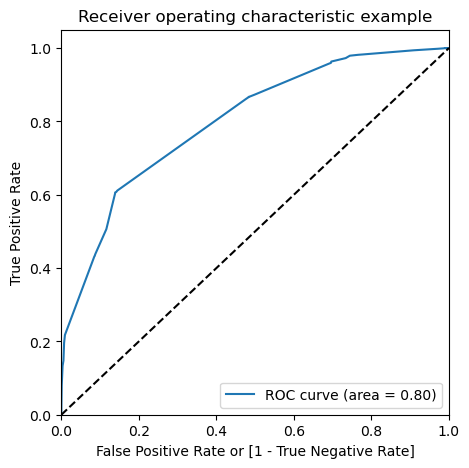

In [89]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under the ROC Curve is higher (0.80). So the model is good one

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.302757,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.012231,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.241549,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.688675,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.302757,7987,0,1,1,1,1,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.538340  0.972608  0.266325
0.2   0.2  0.556763  0.959526  0.304481
0.3   0.3  0.653598  0.861406  0.523431
0.4   0.4  0.762557  0.606705  0.860179
0.5   0.5  0.762715  0.606705  0.860435
0.6   0.6  0.762085  0.603434  0.861460
0.7   0.7  0.692647  0.216271  0.991037
0.8   0.8  0.687451  0.200327  0.992574
0.9   0.9  0.669501  0.150450  0.994622


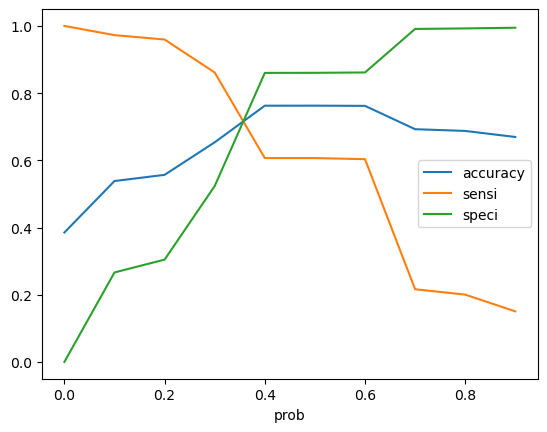

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From this figure we can see that the optimum point is close to 0.4 and also more than 0.3

So we can take 0.35 as cut-off probability

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.302757,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.012231,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.241549,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.688675,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.302757,7987,0,1,1,1,1,0,0,0,0,0,0,0


Assigning Lead Score to the Training data

In [94]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.302757,3009,0,1,1,1,1,0,0,0,0,0,0,0,30
1,0,0.012231,1012,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.241549,9226,0,1,1,1,0,0,0,0,0,0,0,0,24
3,1,0.688675,4750,1,1,1,1,1,1,1,1,0,0,0,1,69
4,1,0.302757,7987,0,1,1,1,1,0,0,0,0,0,0,0,30


# Model Evaluation

In [95]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7617698000314911


In [96]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3351,  554],
       [ 959, 1487]], dtype=int64)

In [97]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [98]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6079313164349959


In [99]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8581306017925736


In [100]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.1418693982074264


In [101]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7285644292013719


In [102]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.7774941995359629


Precision and Recall

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3360,  545],
       [ 962, 1484]], dtype=int64)

In [104]:
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7313947757516017


In [105]:
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.60670482420278


In [106]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7313947757516017


In [107]:
from sklearn.metrics import  recall_score

In [108]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.60670482420278


In [109]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

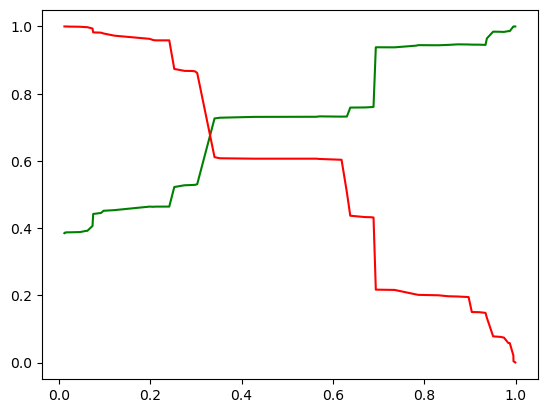

In [111]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

Scaling the test data

In [112]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [114]:
# Assigning the columns selected by the final model to the X_test 
x_test = x_test[col1]
x_test.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1490,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4216,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3830,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [116]:
x_test_sm = sm.add_constant(x_test)


In [118]:
# Assuming cols_used_for_training contains the columns used during training
cols_used_for_training = list(res.params.index)

# Ensure that the columns in x_test_sm align with the features used during training
x_test_sm_selected = x_test_sm[cols_used_for_training]

# If your model was trained with a constant term, add it to the test data
x_test_sm_selected = sm.add_constant(x_test_sm_selected)

# Now, perform prediction
y_test_pred = res.predict(x_test_sm_selected)


In [121]:
y_test_pred.head()

3271    0.241549
1490    0.302757
7936    0.241549
4216    0.936820
3830    0.302757
dtype: float64

In [122]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.241549
1490,0.302757
7936,0.241549
4216,0.936820
3830,0.302757


In [123]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.241549
1,1,1490,0.302757
2,0,7936,0.241549
3,1,4216,0.936820
4,0,3830,0.302757


In [124]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.241549
1,1490,1,0.302757
2,7936,0,0.241549
3,4216,1,0.936820
4,3830,0,0.302757


In [125]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.241549,0
1,1490,1,0.302757,0
2,7936,0,0.241549,0
3,4216,1,0.936820,1
4,3830,0,0.302757,0


In [126]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7554168196841718


In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1490,  244],
       [ 422,  567]], dtype=int64)

In [128]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [129]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.5733063700707786


In [130]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8592848904267589


Assigning Lead Score to the Testing data

In [131]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.241549,0,24
1,1490,1,0.302757,0,30
2,7936,0,0.241549,0,24
3,4216,1,0.936820,1,94
4,3830,0,0.302757,0,30


After running the model on the Test Data , we obtain:

Accuracy : 75.5 %

Sensitivity : 57.3 %

Specificity : 86 %

# RESULT

Test Data Set:

    Accuracy : 75.5 %

    Sensitivity : 57.3 %

    Specificity : 86 %
        

Train Data Set:
    
    Accuracy : 76.1 %

    Sensitivity : 60.8 %

    Specificity : 85.8 %

Finding HOT LEADS

In [133]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
3,4216,1,0.936820,1,94
8,4223,1,0.933795,1,93
16,1946,1,0.896792,1,90
21,2461,1,0.994824,1,99
23,5822,1,0.986935,1,99


In [134]:
hot_leads.shape

(179, 5)

There are 179 hot leads. Which can be converted

In [135]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 4830, 6629, 3542,
       2504, 7674,  446, 5805, 1561,  737, 6582, 6423, 7174, 3932, 5785,
       1867, 7253, 1995, 5797, 4149, 7680, 1663, 3288, 8976, 4462, 5009,
       5292, 6015, 2460, 8106,  373, 8076, 6754, 2960,  802,  358, 7036,
       2680,  112, 6149, 7175, 6999, 8492, 4624, 2481, 4612, 6649,  822,
       2378, 7699, 2342, 8077, 2961, 1542, 2630, 8205, 8461, 5087,  174,
       2674, 8065, 1568, 6895, 6066, 6538, 5700, 5815, 7970, 5804, 7805,
       7016, 5824, 2650, 5808, 1470, 5810,  350, 2584, 4436, 3727, 2118,
       4403, 3194, 1200, 2575, 1299, 2913, 4613, 4909, 8204, 4772, 8082,
       3463, 2486, 2158, 3355, 8296, 7537,  493, 1563, 1550, 5579, 1783,
       1578, 6729, 2011, 4330, 6252, 2285, 7091, 2598, 8840, 4310, 4934,
       1416, 8198,  353, 8088, 7978, 8928, 6567, 6685, 4378, 5455, 2354,
       2559, 4422, 2664, 4068, 9043, 8090, 3762, 4112, 5175, 5209,  662,
       5561, 5633, 3660,  220, 3723,  746, 8592, 42

These are the IDs of HOT LEADS

In [136]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website              2.612051
Last Activity_Had a Phone Conversation    2.421731
Lead Origin_Lead Add Form                 2.162568
Last Notable Activity_Unsubscribed        2.053035
Last Notable Activity_SMS Sent            1.628138
Last Notable Activity_Unreachable         1.399808
const                                     0.533936
Last Activity_Converted to Lead          -1.142194
Lead Origin_Landing Page Submission      -1.368141
Last Activity_Olark Chat Conversation    -1.389402
Specialization_Others                    -1.678142
Do Not Email                             -1.879092
dtype: float64

These are the important features of the final model